#### 1. ☼ Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [1]:
phrase = ['hello','nltk']

In [2]:
phrase + ['!']

['hello', 'nltk', '!']

In [3]:
phrase*2

['hello', 'nltk', 'hello', 'nltk']

In [4]:
phrase[0]

'hello'

In [5]:
phrase[-1:]

['nltk']

In [6]:
sorted(phrase)

['hello', 'nltk']

#### 2. ☼ Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

In [7]:
from nltk.corpus import gutenberg

In [8]:
austen = gutenberg.words('austen-persuasion.txt')

In [9]:
len(austen)

98171

In [10]:
len(set(austen))

6132

#### 3. ☼ Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [11]:
from nltk.corpus import brown, webtext

In [12]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [13]:
from nltk.corpus import brown
brown.words(categories=['romance', 'science_fiction'])

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

#### 4. ☼ Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [14]:
from nltk.corpus import state_union
import nltk
import matplotlib.pyplot as plt

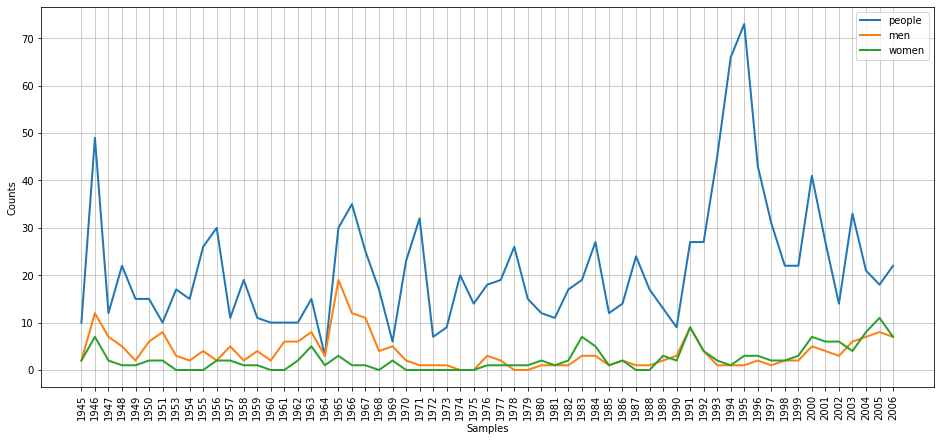

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
cfd = nltk.ConditionalFreqDist(
    (word.lower(), fileid[:4])
    for fileid in state_union.fileids()
    for word in state_union.words(fileid)
    if word.lower() in ['men', 'women', 'people']
)
plt.figure(figsize=(16,7))
cfd.plot()

#### 5. ☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

In [16]:
from nltk.corpus import wordnet as wn
print(wn.synset('human.n.01').part_meronyms())
print(wn.synset('water.n.01').substance_meronyms())
print(wn.synset('forest.n.01').member_meronyms())

[Synset('arm.n.01'), Synset('body_hair.n.01'), Synset('face.n.01'), Synset('foot.n.01'), Synset('hand.n.01'), Synset('human_body.n.01'), Synset('human_head.n.01'), Synset('loin.n.02'), Synset('mane.n.02')]
[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
[Synset('tree.n.01'), Synset('underbrush.n.01')]


In [17]:
print(wn.synset('arm.n.01').part_holonyms())
print(wn.synset('hydrogen.n.01').substance_holonyms())
print(wn.synset('tree.n.01').member_holonyms())

[Synset('body.n.01'), Synset('homo.n.02')]
[Synset('water.n.01')]
[Synset('forest.n.01')]


#### 6. ☼ In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

In [18]:
from nltk.corpus import swadesh

In [19]:
swadesh.fileids() # [Language Codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [20]:
de2en = swadesh.entries(['de','en'])
es2en = swadesh.entries(['es','en'])

In [21]:
translate = dict(de2en)
translate.update(es2en)

In [22]:
len(translate)

412

Tag each key with its language ID.

In [23]:
de2en=[(k+'-de',v) for (k,v) in de2en]
es2en=[(k+'-es',v) for (k,v) in es2en]

In [24]:
translate = dict(de2en)
translate.update(es2en)

In [25]:
len(translate)

412

In [26]:
translate['Hund-de']

'dog'

#### 7. ☼  According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [27]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance('however')

Displaying 25 of 131 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

#### 8. ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

In [28]:
from nltk.corpus import names

In [29]:
names.fileids()

['female.txt', 'male.txt']

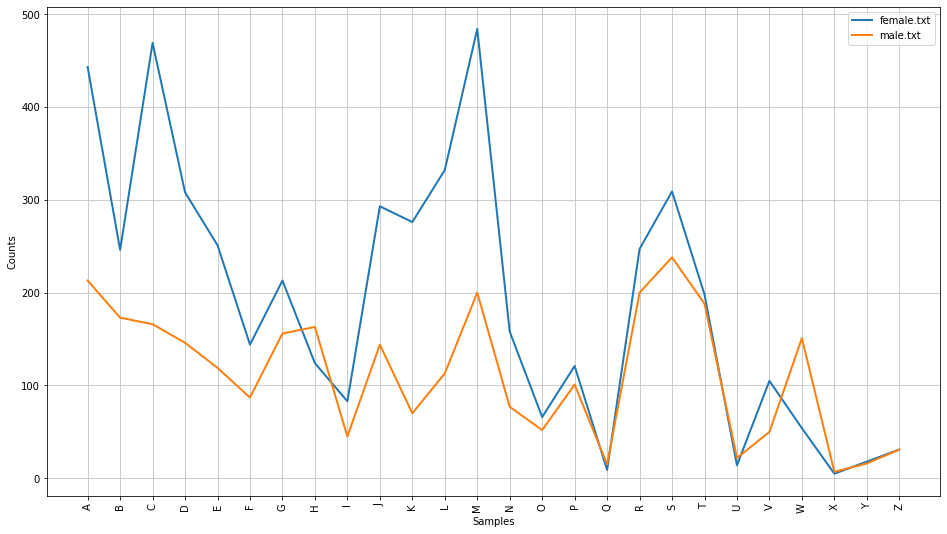

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
pairs = [
    (fileid,name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
]
cfd = nltk.ConditionalFreqDist(pairs)
plt.figure(figsize=(16,9))
cfd.plot()

#### 9. ◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [31]:
from nltk.book import text1,text2

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [32]:
print(text1)
print(text2)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>


In [33]:
def terms(text):
    print('The terms of %s is %d' % (text,len(text)))
terms(text1)
terms(text2)

The terms of <Text: Moby Dick by Herman Melville 1851> is 260819
The terms of <Text: Sense and Sensibility by Jane Austen 1811> is 141576


In [34]:
def richness(text):
    terms = len(text)
    tokens = len(set(text))
    print('The richness of %s is %0.2f%%' % (text,tokens/terms*100))
richness(text1)
richness(text2)

The richness of <Text: Moby Dick by Herman Melville 1851> is 7.41%
The richness of <Text: Sense and Sensibility by Jane Austen 1811> is 4.83%


In [35]:
def genre(text):
    print('The genre of %s is %d' % (text,len(set(text))))
genre(text1)
genre(text2)

The genre of <Text: Moby Dick by Herman Melville 1851> is 19317
The genre of <Text: Sense and Sensibility by Jane Austen 1811> is 6833


In [36]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [37]:
text2.concordance('monstrous')

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


#### 10. ◑ Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

The most common of 20-word vocabulary coverage account for around a third of all words.

#### 11. ◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [38]:
closed_words = ['god','president']
cfd = nltk.ConditionalFreqDist(
    (genre,word.lower()) 
    for genre in brown.categories()
    for word in brown.words(categories=genre)
    if word.lower() in closed_words
)
cfd.tabulate(conditions=['news','religion'])

               god president 
    news         8       142 
religion       136         3 


#### 12. ◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [39]:
from nltk.corpus import cmudict
cmu=cmudict.entries()
print('distinct words:',len(dict(cmu).keys()))
print('More than one pronunciation:',round((len(cmu)-len(dict(cmu).keys()))/len(cmu),2))

distinct words: 123455
More than one pronunciation: 0.08


#### 13. ◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [40]:
from nltk.corpus import wordnet as wn
percentage = len([synset for synset in wn.all_synsets('n') if synset.hyponyms() == []]) \
    /len([synset for synset in wn.all_synsets('n')])
print(round(percentage*100,2),'%')

79.67 %


#### 14. ◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [41]:
def supergloss(s):
    gloss = {}
    gloss[s.name()] = s.definition()
    for hypernym in s.hypernyms():
        gloss[hypernym.name()] =  hypernym.definition()
    for hyponym in s.hyponyms():
        gloss[hyponym.name()] = hyponym.definition()
    return gloss

In [42]:
supergloss(wn.synset('tree.n.01'))

{'tree.n.01': 'a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms',
 'woody_plant.n.01': 'a plant having hard lignified tissues or woody parts especially stems',
 'aalii.n.01': 'a small Hawaiian tree with hard dark wood',
 'acacia.n.01': 'any of various spiny trees or shrubs of the genus Acacia',
 'african_walnut.n.01': 'tropical African timber tree with wood that resembles mahogany',
 'albizzia.n.01': 'any of numerous trees of the genus Albizia',
 'alder.n.02': 'north temperate shrubs or trees having toothed leaves and conelike fruit; bark is used in tanning and dyeing and the wood is rot-resistant',
 'angelim.n.01': 'any of several tropical American trees of the genus Andira',
 'angiospermous_tree.n.01': 'any tree having seeds and ovules contained in the ovary',
 'anise_tree.n.01': 'any of several evergreen shrubs and small trees of the genus Illicium',
 'arbor.n.01': 'tree (as opposed to shrub)',

#### 15. ◑ Write a program to find all words that occur at least three times in the Brown Corpus.

In [43]:
fdist = nltk.FreqDist(brown.words())
words = [ k for k,v in fdist.items() if k.isalpha() and v >= 3]
print(words)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place', 'jury', 'further', 'in', 'the', 'City', 'Executive', 'Committee', 'which', 'had', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'to', 'investigate', 'reports', 'possible', 'won', 'Ivan', 'Allen', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', 'registration', 'laws', 'are', 'outmoded', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 'these', 'studied', 'revised', 'end', 'modernizing', 'improving', 'them', 'grand', 'commented', 'on', 'other', 'topics', 'among', 'purchasing', 'departments', 'well', 'operated', 

#### 16. ◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [44]:
def lexical_diversity(text):
    return len(text) / len(set(text))

text_div = sorted([ 
    (category,lexical_diversity(brown.words(categories=category))) 
    for category in nltk.corpus.brown.categories()
    ],
    key=lambda item: item[1],
    reverse=True
)
text_div

[('learned', 10.788777507562726),
 ('belles_lettres', 9.396666847619565),
 ('government', 8.570712626818237),
 ('romance', 8.284666351159489),
 ('mystery', 8.188054998567745),
 ('adventure', 7.814063556457065),
 ('lore', 7.60525408536165),
 ('fiction', 7.362717695119329),
 ('news', 6.98582742809504),
 ('hobbies', 6.899455383326351),
 ('editorial', 6.22891809908999),
 ('religion', 6.182174799937235),
 ('reviews', 4.718757245536749),
 ('science_fiction', 4.475719146303742),
 ('humor', 4.324297388877816)]

#### 17. ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [45]:
def most_50_words_without_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    words = [ w.lower() for w in text if w.isalpha() and w.lower() not in stopwords]
    fdist = nltk.FreqDist(words)
    return [ w for w,f in fdist.most_common(50)]

print(most_50_words_without_stopwords(text1))

['whale', 'one', 'like', 'upon', 'man', 'ship', 'ahab', 'ye', 'sea', 'old', 'would', 'though', 'head', 'yet', 'boat', 'time', 'long', 'captain', 'still', 'great', 'said', 'two', 'must', 'seemed', 'white', 'last', 'see', 'thou', 'way', 'whales', 'stubb', 'queequeg', 'little', 'round', 'three', 'say', 'men', 'sperm', 'may', 'first', 'every', 'well', 'us', 'much', 'could', 'good', 'hand', 'side', 'ever', 'never']


#### 18. ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [46]:
def most_50_bigrams_without_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams = [ bigram for bigram in nltk.bigrams(text) \
               if bigram[0].isalpha() \
               and bigram[1].isalpha() \
               and bigram[0] not in stopwords  \
               and bigram[1] not in stopwords
              ]
    fdist = nltk.FreqDist(bigrams)
    return [ bigram for bigram,f in fdist.most_common(50)]

print(most_50_bigrams_without_stopwords(text1))

[('Sperm', 'Whale'), ('Moby', 'Dick'), ('old', 'man'), ('White', 'Whale'), ('I', 'say'), ('Captain', 'Ahab'), ('sperm', 'whale'), ('said', 'I'), ('I', 'thought'), ('I', 'know'), ('Right', 'Whale'), ('I', 'could'), ('But', 'I'), ('I', 'think'), ('ye', 'see'), ('thought', 'I'), ('I', 'would'), ('Captain', 'Peleg'), ('cried', 'Ahab'), ('white', 'whale'), ('I', 'must'), ('one', 'hand'), ('I', 'saw'), ('I', 'see'), ('I', 'shall'), ('cried', 'Stubb'), ('one', 'side'), ('every', 'one'), ('let', 'us'), ('never', 'mind'), ('I', 'suppose'), ('OF', 'THE'), ('years', 'ago'), ('I', 'never'), ('I', 'mean'), ('New', 'Bedford'), ('At', 'last'), ('said', 'Stubb'), ('I', 'tell'), ('cried', 'Starbuck'), ('something', 'like'), ('Cape', 'Horn'), ('lower', 'jaw'), ('Look', 'ye'), ('well', 'known'), ('But', 'though'), ('I', 'guess'), ('would', 'seem'), ('ivory', 'leg'), ('old', 'Ahab')]


#### 19. ◑ Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

In [47]:
def table(words, genres):
    cfd = nltk.ConditionalFreqDist(
        (genre, word.lower())
        for genre in brown.categories()
        for word in brown.words(categories=genre))
    cfd.tabulate(conditions=genres, samples=words)

table(['god','president'],['news','religion']) 

               god president 
    news         8       142 
religion       136         3 


#### 20. ◑ Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [48]:
def word_freq(word, genre):
    fdist = nltk.FreqDist([w.lower() for w in brown.words(categories=genre)])
    return fdist[word]
word_freq('god', 'religion')

136

#### 21. ◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [49]:
def guess(text):
    cmu = cmudict.dict()
    count = 0
    
    for w in text:
        try:
            if w.isalpha():
                count += len(cmu[w.lower()][0])
        except KeyError:
            print('"' + w.lower() + '" does not exist in CMU!')
            continue
    return count

guess(['hello','nltk','!'])

"nltk" does not exist in CMU!


4

#### 22. ◑ Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [50]:
def hedge(text):
    text_hedged = []
    count = 0
    for word in text:
        text_hedged.append(word)
        count = count + 1
        if count == 3:
            text_hedged.append('like')
            count = 0
    return text_hedged

hedge(['hello','nltk','!'])

['hello', 'nltk', '!', 'like']

#### 23. ★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
1. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
2. Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

In [51]:
def zipf(text):
    fdist = nltk.FreqDist([ w.lower() for w in text if w.isalpha()])
    x = range(200)
    y = [v for k,v in fdist.most_common(200)]
    print('50th most common word frequency',sum(y[:50]))
    print('the rest common word frequency', sum(y[50:]))
    plt.plot(x,y)

50th most common word frequency 92848
the rest common word frequency 38449


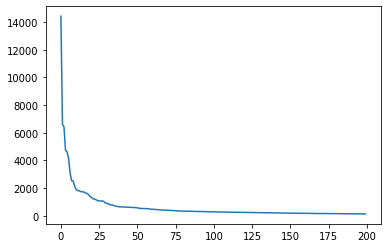

In [52]:
zipf(text1)

50th most common word frequency 2424
the rest common word frequency 773


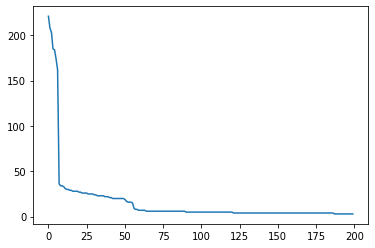

In [53]:
import random
text = ''
for i in range(100000):
    text += random.choice('abcdefg ')
text = text.split(' ')
zipf(text)

The random generated text is also like the Zipf's Law. In some implemmentation, their algorithm use the random generated negative sample rather than the distribution besed on frequency.

#### 24. ★ Modify the text generation program in 2.2 further, to do the following tasks:
1. Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)
2. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
3. Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [54]:
def generate_model(text,num=15,n=50):
    words = [w for w, count in nltk.FreqDist(text).most_common(n) ]
    bigrams = nltk.bigrams(text)
    cfd = nltk.ConditionalFreqDist(bigrams)
    word = random.choice(words)
    for i in range(num):
        print(word, end=' ')
        word = cfd[word].max()     

In [55]:
generate_model(brown.words(categories=['adventure']))

man , and the door . `` I was a little girls were the door 

In [56]:
generate_model(brown.words(categories=['adventure']),num=7)

'' . `` I was a little 

In [57]:
generate_model(brown.words(categories=['adventure']),15,100)

you '' . `` I was a little girls were the door . `` I 

In [58]:
generate_model(brown.words(categories=['adventure']),7,100)

It was a little girls were the 

The text is not as intelligible as I suppose.  
Strengths:  
1. Easy to generate

Weaknesses:  
1. Some perticular words is often to generated than others, e.g. a little girls.
2. Grammatical errors

In [59]:
for i in range(10):
    categories = random.choices(brown.categories(),k=2)
    print(i,categories)
    generate_model(brown.words(categories=categories))
    print()

0 ['editorial', 'science_fiction']
with the United States and the United States and the United States and the United 
1 ['news', 'science_fiction']
an hour , and the first time . The President Kennedy , and the first 
2 ['religion', 'news']
that the first time . The new members of the first time . The new 
3 ['humor', 'news']
from the first time , and the first time , and the first time , 
4 ['news', 'belles_lettres']
`` I have been a new and the first time , and the first time 
5 ['romance', 'belles_lettres']
'' . The first time , and the same time , and the same time 
6 ['adventure', 'learned']
he was a few minutes . The first , and the same time , and 
7 ['hobbies', 'reviews']
and the first time . The first time . The first time . The first 
8 ['lore', 'editorial']
to the United States . The only a few years ago , and the United 
9 ['lore', 'adventure']
one of the first . The man , and the first . The man , 


#### 26. ★ Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [60]:
def find_language(word):
    from nltk.corpus import udhr
    return [ fileid[:-7] for fileid in udhr.fileids() if word.lower() in udhr.words(fileid) and fileid.endswith('-Latin1')]

In [61]:
find_language('hi')

['Catalan',
 'Catalan_Catala',
 'Chickasaw',
 'Cokwe',
 'Guarani',
 'Lunda_Chokwe-lunda',
 'Paez',
 'Sukuma',
 'Welsh_Cymraeg']

#### 27. ★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [62]:
from nltk.corpus import wordnet as wn

def avg_polsemy(word_type):
    sum = 0
    for synset in wn.all_synsets(word_type):
        word = synset.name().split('.')[0]
        sum += len(wn.synsets(word))
    return sum/len(list(wn.all_synsets(word_type)))   

In [63]:
print('average polysemy of nouns',avg_polsemy(wn.NOUN))
print('average polysemy of verbs',avg_polsemy(wn.VERB))
print('average polysemy of adjectives',avg_polsemy(wn.ADJ))
print('average polysemy of adverbs',avg_polsemy(wn.ADV))

average polysemy of nouns 2.5582049564634963
average polysemy of verbs 7.9760296360862935
average polysemy of adjectives 3.7294007490636703
average polysemy of adverbs 2.603148301574151


#### 28. ★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [64]:
pairs = [('car', 'automobile'), ('gem', 'jewel'), ('journey', 'voyage'), ('boy', 'lad'), ('coast', 'shore'), 
         ('asylum', 'madhouse'), ('magician', 'wizard'), ('midday', 'noon'), ('furnace', 'stove'), ('food', 'fruit'), 
         ('bird', 'cock'), ('bird', 'crane'), ('tool', 'implement'), ('brother', 'monk'), ('lad', 'brother'), 
         ('crane', 'implement'), ('journey', 'car'), ('monk', 'oracle'), ('cemetery', 'woodland'), ('food', 'rooster'), 
         ('coast', 'hill'), ('forest', 'graveyard'), ('shore', 'woodland'), ('monk', 'slave'), ('coast', 'forest'), 
         ('lad', 'wizard'), ('chord', 'smile'), ('glass', 'magician'), ('rooster', 'voyage'), ('noon', 'string')]
lch = []
for word1, word2 in pairs:
    lch.append((word1, word2, wn.lch_similarity(wn.synsets(word1)[0], wn.synsets(word2)[0])))
from operator import itemgetter
sorted(lch,key=itemgetter(2),reverse=True)

[('car', 'automobile', 3.6375861597263857),
 ('midday', 'noon', 3.6375861597263857),
 ('coast', 'shore', 2.9444389791664407),
 ('tool', 'implement', 2.9444389791664407),
 ('boy', 'lad', 2.538973871058276),
 ('journey', 'voyage', 2.2512917986064953),
 ('coast', 'hill', 2.0281482472922856),
 ('shore', 'woodland', 2.0281482472922856),
 ('monk', 'slave', 2.0281482472922856),
 ('lad', 'wizard', 2.0281482472922856),
 ('magician', 'wizard', 1.845826690498331),
 ('lad', 'brother', 1.6916760106710724),
 ('gem', 'jewel', 1.55814461804655),
 ('asylum', 'madhouse', 1.55814461804655),
 ('brother', 'monk', 1.55814461804655),
 ('monk', 'oracle', 1.55814461804655),
 ('bird', 'crane', 1.4403615823901665),
 ('cemetery', 'woodland', 1.4403615823901665),
 ('glass', 'magician', 1.4403615823901665),
 ('crane', 'implement', 1.3350010667323402),
 ('food', 'fruit', 1.2396908869280152),
 ('coast', 'forest', 1.2396908869280152),
 ('chord', 'smile', 1.2396908869280152),
 ('furnace', 'stove', 1.072636802264849),
 